In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [14]:
df = pd.read_csv('iris.csv',header=None)
print(df.shape)
df.columns = ['a','b','c','d','y']
print(df.head())
print(df.describe(include = 'all'))
print(df.shape)

(150, 5)
     a    b    c    d            y
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
                 a           b           c           d            y
count   150.000000  150.000000  150.000000  150.000000          150
unique         NaN         NaN         NaN         NaN            3
top            NaN         NaN         NaN         NaN  Iris-setosa
freq           NaN         NaN         NaN         NaN           50
mean      5.843333    3.054000    3.758667    1.198667          NaN
std       0.828066    0.433594    1.764420    0.763161          NaN
min       4.300000    2.000000    1.000000    0.100000          NaN
25%       5.100000    2.800000    1.600000    0.300000          NaN
50%       5.800000    3.000000    4.350000    1.300000          NaN
75%       6.400000    3.300000    5.100000    1.800000          NaN
max       7.900000    4.400000   

In [15]:
X,y = df[['a','b','c','d']],df['y']
Xtrn,Xtst,Ytrn,Ytst = train_test_split(X,y,test_size=0.5,random_state=0)
print(y.value_counts())
Model = LogisticRegression()
Model = Model.fit(Xtrn,Ytrn)
Model.predict(Xtst)

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: y, dtype: int64


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-

In [16]:
from sklearn.metrics import confusion_matrix

ypred = Model.predict(Xtst)

print("Real Observed Test DataSet")
print(Ytst.value_counts())

print("\nObserved by our Model")
q=pd.DataFrame(ypred,columns=['Prediction'])
q.Prediction.value_counts()

Real Observed Test DataSet
Iris-versicolor    30
Iris-virginica     24
Iris-setosa        21
Name: y, dtype: int64

Observed by our Model


Iris-virginica     36
Iris-setosa        21
Iris-versicolor    18
Name: Prediction, dtype: int64

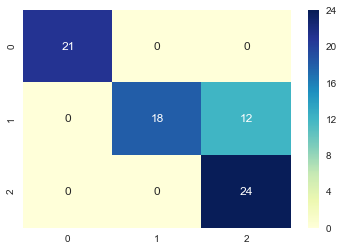

In [17]:
conf = confusion_matrix(Ytst,ypred)
sns.heatmap(conf,annot=True,fmt='g',cmap='YlGnBu')

In [18]:
import sklearn.metrics as mt

print("Accuracy of model is : ",mt.accuracy_score(Ytst,ypred))

print("\n\n",mt.classification_report(Ytst,ypred))

#print("Precision of model is : ",mt.precision_score(Ytst,ypred))
#print("Rcall of model is : ",mt.recall_score(Ytst,ypred))
#print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy of model is :  0.84


                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.60      0.75        30
 Iris-virginica       0.67      1.00      0.80        24

    avg / total       0.89      0.84      0.84        75



In [19]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y,[0,1,2])
n_classes = y.shape[1]


# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


In [20]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

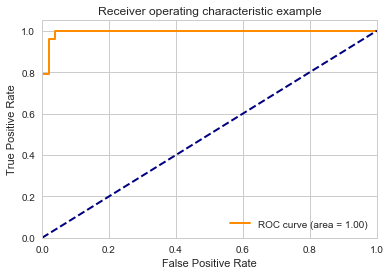

In [21]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

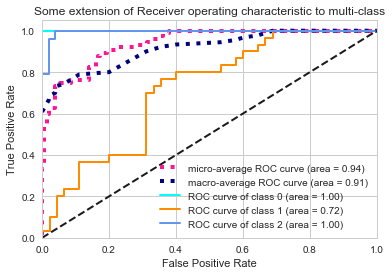

In [22]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()